# Lab 3 - Clustering

Name: Đinh Vũ Gia Hân 

Class: 22KHMT2

ID: 22127098 

# Self-evaluation

| No.   | Details                                           | Level of completion     |
|-------|---------------------------------------------------|-------------------------|
| 1     | Partitioning Approach: K-Means.                   | 35%                     |
| 2     | Hierarchical Method: Agglomerative Clustering.    | 35%                     |
| 3     | Density-Based: DBSCAN.                            | 30%                     |
|       | Total                                             | 100%                    |

# Import neccessary library

This lab use the following libraries:
- **mathplotlib**: for plotting data
- **warnings**: for ignoring warnings when plotting data 

In [8]:
# import libraries                            
import matplotlib.pyplot as plt             
import warnings                  
warnings.filterwarnings('ignore') 

# Read dataset

This lab utilizes the Wine Recognition dataset from Scikit-learn, which encompasses chemical analysis results of 178 wine samples. The dataset features 13 numerical attributes characterizing the physicochemical properties of each wine, including Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline.

To prepare the dataset for subsequent clustering analysis, a preprocessing step involving standard normalization will be applied. This normalization ensures that all features contribute equally to the clustering process, preventing features with larger scales from dominating the results.

In [9]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the dataset
wine = load_wine ()

# Get features and target
X = wine.data
y = wine.target

# Instantiate the scaler
scaler = StandardScaler()

# Standardize the features
X = scaler.fit_transform(X)

# Clustering algorithms

## Partitioning Approach: K-Means

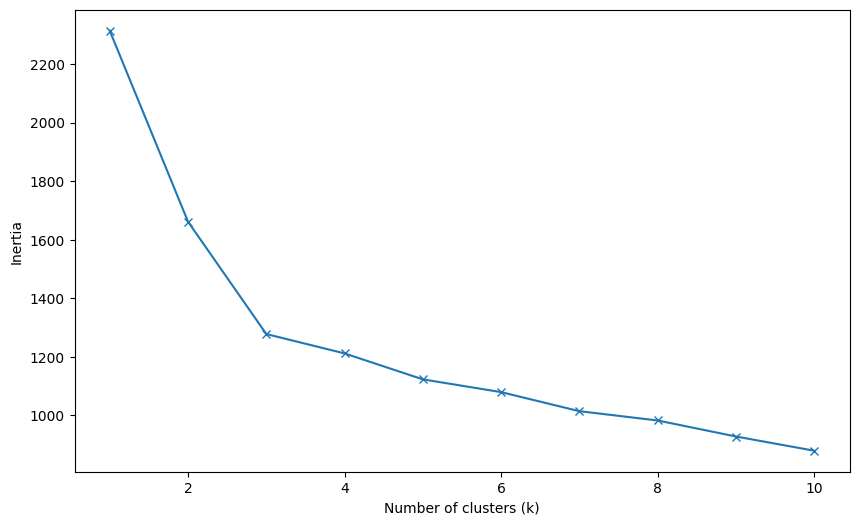

In [10]:
from sklearn.cluster import KMeans

# Instantiate the KMeans model
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  
    inertias.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='x')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

The Elbow Method is a popular way to find the best number of clusters (k) for K-Means. We plot the within-cluster sum of squares (WCSS) on the y-axis against the different values of k on the x-axis. This creates an 'elbow' graph.

The optimal k is where the graph makes a sharp bend – like an elbow! Before the elbow, the WCSS decreases rapidly as we increase k. After the elbow, the decrease in WCSS slows down significantly.

In the figure above, we plotted WCSS for k values from 1 to 10. We can clearly see an elbow at k = 3. The WCSS drops sharply from k = 1 to k = 3, but then the rate of decrease slows down considerably. So, we choose k = 3 as the optimal number of clusters for our K-Means algorithm.

Let's plot the k = 3 clusters on three dimension using PCA to visualize our result.

In [11]:
from sklearn.decomposition import PCA
import plotly.express as px

# Instantiate the PCA class
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Fit the KMeans model with the optimal k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
cluters = kmeans.fit_predict(X_pca)

# Visualize the clusters
fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2, color=cluters,
    labels={'color': 'Cluster'}
)
fig.show()

## Hierarchical Method: Agglomerative Clustering

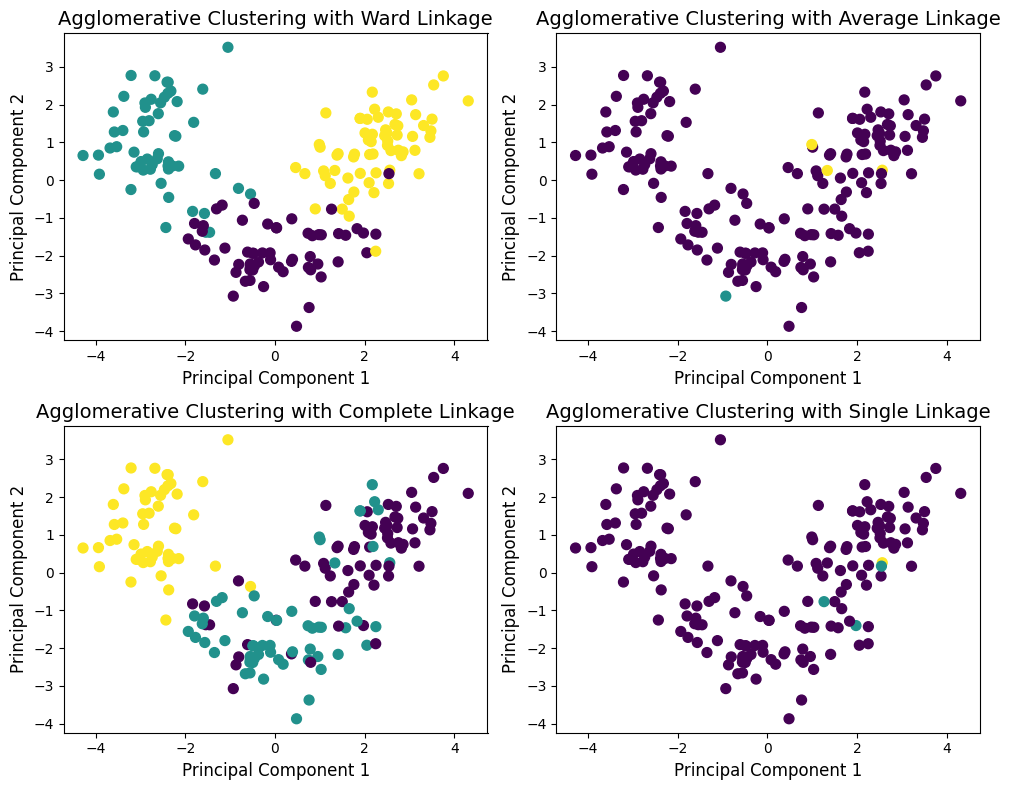

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# List of linkage methods
linkages = ['ward', 'average', 'complete', 'single']

# Reduce data to 2D for visualization
X_pca_2d = PCA(n_components=2).fit_transform(X)

# Iterate through linkage methods and plot
for i, linkage in enumerate(linkages):
    # Row and column index for the subplot
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Perform clustering
    agg = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    clusters = agg.fit_predict(X)

    # Scatter plot
    ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters, cmap='viridis', s=50)
    ax.set_title(f'Agglomerative Clustering with {linkage.capitalize()} Linkage', fontsize=14)
    ax.set_xlabel('Principal Component 1', fontsize=12)
    ax.set_ylabel('Principal Component 2', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

Agglomerative clustering, also known as AGNES (Agglomerative Nesting), is a common hierarchical clustering technique. It starts by treating each data point as a single cluster. Then, it gradually merges pairs of the most similar clusters until all data points are grouped into a single large cluster. This process creates a hierarchical tree-like structure called a dendrogram.

The linkage function plays a crucial role in this process. It uses a distance metric (like the one calculated by the dist() function) to determine the similarity between clusters. Different linkage methods, such as Ward, Average, Complete, and Single Linkage, use different ways to define the distance between clusters. 

In this lab, we experiment with these four linkage methods and draw some conclusions as follows:
- **Ward Linkage:** Using Ward Linkage, we identified three distinct clusters. These clusters were well-separated from each other with minimal overlap, suggesting a clear grouping of data points.
- **Average Linkage:** This method also produced three clusters, but the distribution was less balanced. One cluster was significantly larger than the other two, which appeared to be quite small and potentially represented noise or outliers.
- **Complete Linkage:** Complete Linkage also resulted in three clusters, however, the separation between these clusters was less pronounced. There was a noticeable degree of overlap between the clusters, indicating less distinct groupings.
- **Single Linkage:** Single Linkage produced only two clusters. One cluster was considerably larger, while the other was extremely small, suggesting that it might consist primarily of outliers or noise within the data.

Based on these observations, Ward Linkage seems to be the most suitable method for clustering our dataset. We'll now visualize this by plotting the dendrogram using Ward Linkage to further confirm our choice.

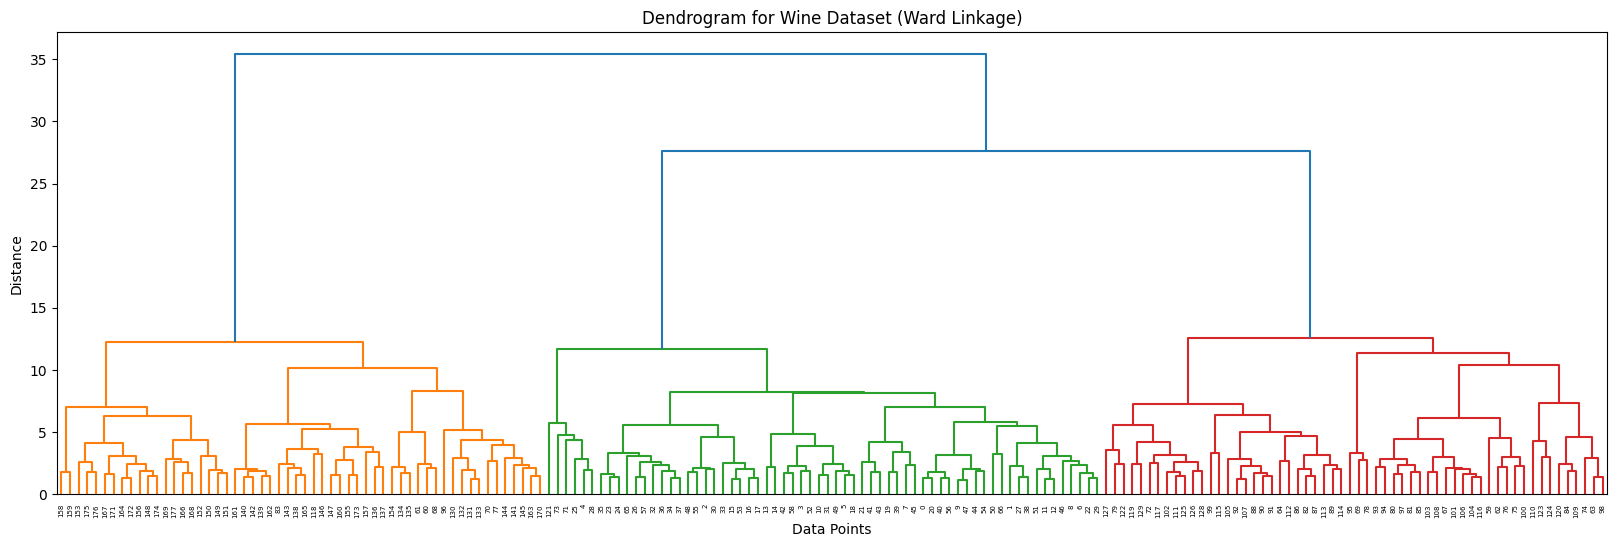

In [13]:
from scipy.cluster.hierarchy import  dendrogram, linkage

# Calculate the linkage matrix
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Wine Dataset (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## Density-Based: DBSCAN

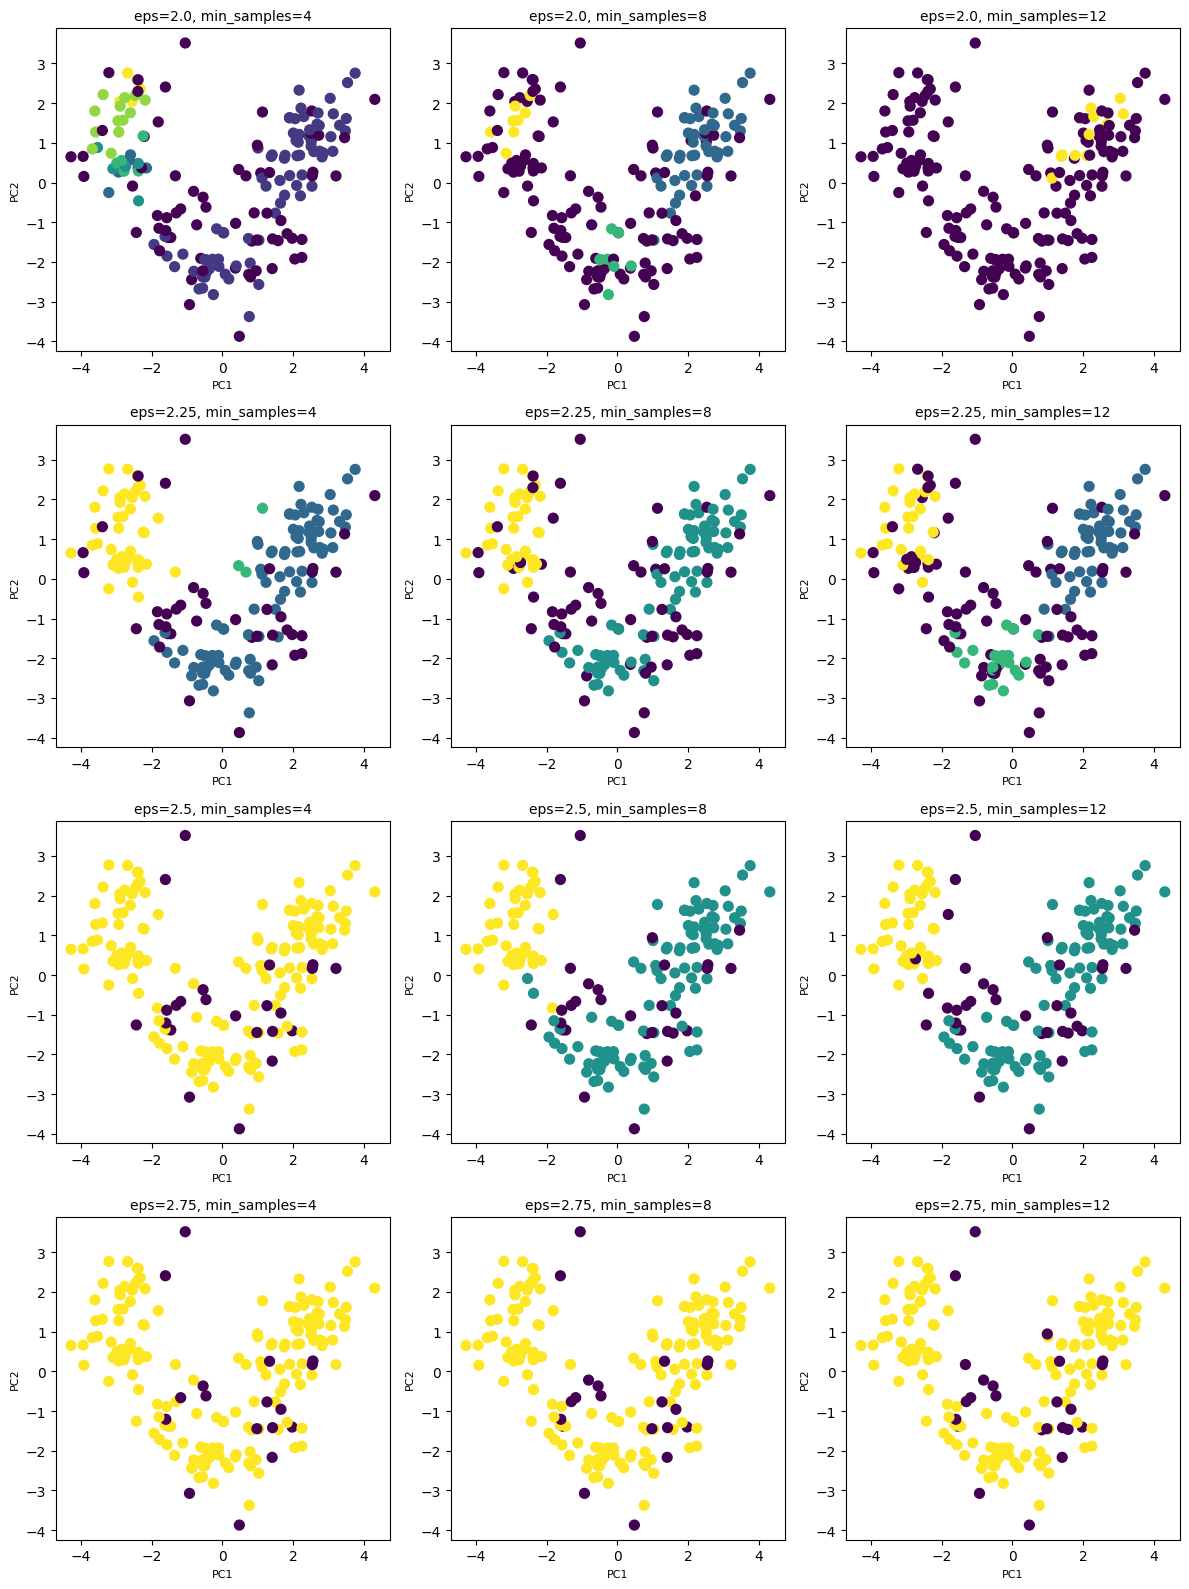

In [14]:
from sklearn.cluster import DBSCAN

# Parameter grid
eps_values = [2.0, 2.25, 2.5, 2.75]
min_samples_values = [4, 8, 12]

# Create a 3x4 grid for subplots
fig, axes = plt.subplots(4, 3, figsize=(12, 16))

# Reduce data to 2D for visualization
X_pca_2d = PCA(n_components=2).fit_transform(X)

# Iterate through all combinations of eps and min_samples
for idx, (eps, min_samples) in enumerate([(e, ms) for e in eps_values for ms in min_samples_values]):
    # Calculate row and column index for subplot
    row, col = divmod(idx, 3)
    ax = axes[row, col]

    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    # Scatter plot in the subplot
    ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters, cmap='viridis', s=50)
    ax.set_title(f'eps={eps}, min_samples={min_samples}', fontsize=10)
    ax.set_xlabel('PC1', fontsize=8)
    ax.set_ylabel('PC2', fontsize=8)

# Adjust layout and show all plots
plt.tight_layout()
plt.show()

The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

The figure above shows the results of DBSCAN clustering with different combinations of eps and min_samples.
- With `eps`: When we increase eps, we're essentially widening the neighborhood around each data point. This means it's easier for points to be considered neighbors, leading to a lower density requirement for cluster formation. We can see this in the image by comparing the rows. In the top row, with a smaller eps, many points remain isolated. As we move down the rows and eps increases, more and more points are grouped together.
- With `min_samples`: Increasing min_samples means we need more points within a neighborhood to form a cluster. This makes it harder to satisfy the clustering criteria and thus increases the density requirement. We can observe this by comparing the columns. In the leftmost column, with a smaller min_samples, more points are clustered together. As we move to the right and min_samples increases, fewer points are clustered.

In summary, increasing eps lowers the density threshold for cluster formation, while increasing min_samples raises it.